### Part 1

# Imports

In [1]:
import re   #Regular Expression
import matplotlib.pyplot as plt
import pandas as pd   #Pandas to Handle Data
import numpy as np     
import nltk    #Natural Language ToolKit for Tokenizing  Word
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Helps to remove common words such as pronouns and adjective to clean out data
nltk.download('stopwords')
from tqdm import tqdm #Importing tqdm to track progress

[nltk_data] Downloading package stopwords to C:\Users\Maaz
[nltk_data]     Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Handling the dataset

Here is How I handle Data for this dataset


In [2]:
data=pd.read_csv("C:/Users/Maaz Karim/datasets/datasets/datasetV3.csv")
data.head()

,Data,Date,Time,tweet0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,That looks so good tuesdayvibes tacotuesday,LIVE NOW TUESDAY NIGHT KPOP W Unreal NOW OHIO ...,My damn followers haven t moved in weeks I m g...,Common sense is not that common You can t coun...,Just landing naturephotography nature Travel t...,LIVE NOW TUESDAY NIGHT KPOP W Unreal NOW SUMME...,Involuntary manslaughter is distinguished from...,How was your day keepgoing throughitall carryo...,Happy scrolls down on the notification bar to ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,2 features in highlight realmeC11 in the realm...,realmeC11 Bigger battery and larger display,1 It is backed by a bigger 5000 mAh battery 2 ...,1 Bigger Battery 5000mAh Massive Battery 2 Lar...,4th phone under Realme C series RealmeC11,Hey its high time to release new watch faces f...,The new entry of the realme C series boasts a ...,realmeC11 Price is too much bro realmeC11 ki M...,The new entry to the realme C series boasts a ...
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,It s really insulting that Nepal PM has said w...,We always loved amp respect India but see what...,This is it Ayodhya KPSharmaOli,Watch Gravitas Nepal KP Sharma Oli s desperate...,is minting money and making foolish to innocen...,diya That means all well doing nepalese immigr...,st No make sense how about Pakistani Maybe you...,Intelligent PM Bought 6 Chinese planes that Dh...,st India offered Nepal to access port with fre...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Trending Entertainment News Today Rhea Chakrab...,Trending Entertainment News Today Rhea Chakrab...,Rhea Chakraborty breaks her silence on Sushant...,Support your bravery we are with you amp we wo...,Rhea Chakraborty pens an emotional note on los...,Newswrap July 14 Rhea s note for Sushant Singh...,Rhea Chakraborty s heartfelt post for Sushant ...,SushantSinghRajput No amount of PR of Rhea Cha...,Why r u silent if u really loves him then why ...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,CM of Gujrat set an example punish MLA not the...,I proud of you madam Stop Transfer Sunita Yadav,Thank u so much for ur valuable information Od...,I support Stop Transfer Sunita Yadav SunitaYad...,Stop Transfer Sunita Yadav We stand with U i s...,yadav 0 SunitaYadav stop transfer,hope it was passion to do than slogging for a ...,Stop Transfer Sunita Yadav if you tell truth u...,Immediate transfer of an employee after such e...


Here we can see that we have a number of trending topics with 10 tweets.


Now let us pre-process the data by removing StopWords.

In [3]:
swe_nltk=stopwords.words('english') #Saving all stopwords into a python list

In [4]:
df=pd.DataFrame(data)   #Converting data into a DataFrame

In [5]:
for i in range(df.shape[0]):
    for j in range(9):
        text=str(df.loc[i,str('tweet'+str(j))])
        words = [word for word in text.split() if word.lower() not in swe_nltk]
        new_text = " ".join(words)
        
        df.loc[i,str('tweet'+str(j))]=new_text

In [6]:
df.head()

,Data,Date,Time,tweet0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9
0,tuesdayvibes,7/14/2020,7:00:21,Love vacation vibes amazing beautiful cabo mex...,looks good tuesdayvibes tacotuesday,LIVE TUESDAY NIGHT KPOP W Unreal OHIO tuesdayv...,damn followers moved weeks getting 50 60 day l...,Common sense common count Unfortunately presen...,landing naturephotography nature Travel travel...,LIVE TUESDAY NIGHT KPOP W Unreal SUMMER BREEZE...,Involuntary manslaughter distinguished forms h...,day keepgoing throughitall carryon TuesdayMoti...,Happy scrolls down on the notification bar to ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone 20k Please vote help re...,2 features highlight realmeC11 realme C Series...,realmeC11 Bigger battery larger display,1 backed bigger 5000 mAh battery 2 aspect rati...,1 Bigger Battery 5000mAh Massive Battery 2 Lar...,4th phone Realme C series RealmeC11,Hey high time release new watch faces realmeba...,new entry realme C series boasts 5000mah Batte...,realmeC11 Price much bro realmeC11 ki Memu Gue...,The new entry to the realme C series boasts a ...
2,KPSharmaOli,7/14/2020,7:00:21,shree problem people problem Stupid Communist ...,really insulting Nepal PM said knows birth lor...,always loved amp respect India see media gover...,Ayodhya KPSharmaOli,Watch Gravitas Nepal KP Sharma Oli desperate b...,minting money making foolish innocent Nepali N...,diya means well nepalese immigrate India well ...,st make sense Pakistani Maybe treated brothers...,Intelligent PM Bought 6 Chinese planes Dhaka r...,st India offered Nepal to access port with fre...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty Heartbreaking Post Sushant Si...,Trending Entertainment News Today Rhea Chakrab...,Trending Entertainment News Today Rhea Chakrab...,Rhea Chakraborty breaks silence Sushant Singh ...,Support bravery amp stop justice given Sushant...,Rhea Chakraborty pens emotional note losing Su...,Newswrap July 14 Rhea note Sushant Singh Rajpu...,Rhea Chakraborty heartfelt post Sushant Singh ...,SushantSinghRajput amount PR Rhea Chakraborty ...,Why r u silent if u really loves him then why ...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,stand Sunita Yadav Stop Transfer women empower...,CM Gujrat set example punish MLA lady cop Stop...,proud madam Stop Transfer Sunita Yadav,Thank u much ur valuable information OdishaFig...,support Stop Transfer Sunita Yadav SunitaYadav...,Stop Transfer Sunita Yadav stand U support sun...,yadav 0 SunitaYadav stop transfer,hope passion slogging secured job retire sugge...,Stop Transfer Sunita Yadav tell truth u vl jai...,Immediate transfer of an employee after such e...


Now We can see stopwords has been removed.

# Building functions 

In [7]:
#Installing PyTorch
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
    

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [8]:
#Installing Transformers
!pip install transformers

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification 
import torch

In [10]:
# Tokenizing tokens from a pre-trained model

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#Using Pre-trained model for Classification
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [11]:
# Making a sentiment_score function which will return us the value between 0 and 5. 
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [12]:
df['score']=0
for i in tqdm(range(1000)):
    for j in range(9):
        df.loc[i,'score']=sentiment_score(df.loc[i,str('tweet'+str(j))])+df.loc[i,'score']

100%|██████████| 1000/1000 [11:53<00:00,  1.40it/s]


In [13]:
df['score']=df['score']/10 #Calculating average score

In [14]:
df.head()

,Data,Date,Time,tweet0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,score
0,tuesdayvibes,7/14/2020,7:00:21,Love vacation vibes amazing beautiful cabo mex...,looks good tuesdayvibes tacotuesday,LIVE TUESDAY NIGHT KPOP W Unreal OHIO tuesdayv...,damn followers moved weeks getting 50 60 day l...,Common sense common count Unfortunately presen...,landing naturephotography nature Travel travel...,LIVE TUESDAY NIGHT KPOP W Unreal SUMMER BREEZE...,Involuntary manslaughter distinguished forms h...,day keepgoing throughitall carryon TuesdayMoti...,Happy scrolls down on the notification bar to ...,2.7
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone 20k Please vote help re...,2 features highlight realmeC11 realme C Series...,realmeC11 Bigger battery larger display,1 backed bigger 5000 mAh battery 2 aspect rati...,1 Bigger Battery 5000mAh Massive Battery 2 Lar...,4th phone Realme C series RealmeC11,Hey high time release new watch faces realmeba...,new entry realme C series boasts 5000mah Batte...,realmeC11 Price much bro realmeC11 ki Memu Gue...,The new entry to the realme C series boasts a ...,3.1
2,KPSharmaOli,7/14/2020,7:00:21,shree problem people problem Stupid Communist ...,really insulting Nepal PM said knows birth lor...,always loved amp respect India see media gover...,Ayodhya KPSharmaOli,Watch Gravitas Nepal KP Sharma Oli desperate b...,minting money making foolish innocent Nepali N...,diya means well nepalese immigrate India well ...,st make sense Pakistani Maybe treated brothers...,Intelligent PM Bought 6 Chinese planes Dhaka r...,st India offered Nepal to access port with fre...,1.6
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty Heartbreaking Post Sushant Si...,Trending Entertainment News Today Rhea Chakrab...,Trending Entertainment News Today Rhea Chakrab...,Rhea Chakraborty breaks silence Sushant Singh ...,Support bravery amp stop justice given Sushant...,Rhea Chakraborty pens emotional note losing Su...,Newswrap July 14 Rhea note Sushant Singh Rajpu...,Rhea Chakraborty heartfelt post Sushant Singh ...,SushantSinghRajput amount PR Rhea Chakraborty ...,Why r u silent if u really loves him then why ...,1.6
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,stand Sunita Yadav Stop Transfer women empower...,CM Gujrat set example punish MLA lady cop Stop...,proud madam Stop Transfer Sunita Yadav,Thank u much ur valuable information OdishaFig...,support Stop Transfer Sunita Yadav SunitaYadav...,Stop Transfer Sunita Yadav stand U support sun...,yadav 0 SunitaYadav stop transfer,hope passion slogging secured job retire sugge...,Stop Transfer Sunita Yadav tell truth u vl jai...,Immediate transfer of an employee after such e...,1.3


Now we can see The scores of the tweets of each trending topic the lesser the score the more disliked topic it is.

In [15]:
# To find most liked topic of the day.
print("Liked Topic of the day is " + str(df.loc[df['score'].idxmax(),'Data']) +" with the score of "+ str(df.loc[df['score'].idxmax(),'score']) )
# To find most disliked topic of the day.
print("Most disliked Topic of the day is " + str(df.loc[df['score'][0:999].idxmin(),'Data']) +" with the score of "+ str(df.loc[df['score'][0:999].idxmin(),'score']))

Liked Topic of the day is  HBDSarathkumar with the score of 4.5
Most disliked Topic of the day is  VizagBlast with the score of 0.9


We can conclude that in the top 1000 tweets the most Liked topic is HDBSarathKumar with avg score of 4.5 and most disliked topic in top 1000 tweets is VizagBlast with avg score of 0.9.

### Part 2

# Plots

### For Top 10 Tweets

Text(0.5, 1.0, 'Score vs Top 10 Trending Tweets')

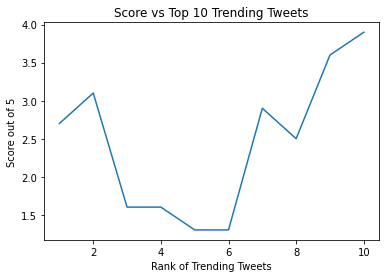

In [16]:
#code
plt.plot(list(range(1,11)),df['score'][0:10])
plt.xlabel('Rank of Trending Tweets')
plt.ylabel('Score out of 5')
plt.title('Score vs Top 10 Trending Tweets')

Now let us see score using bar charts.

In [17]:
x_label=(list(range(0,6)))
y_label=[round(num) for num in df['score'][0:10]]

In [18]:
import collections
y_label=collections.Counter(y_label)
li = [0,0,0,0,0,0]
index=0
for i in y_label.keys():
    li[i]=y_label[i]

<BarContainer object of 6 artists>

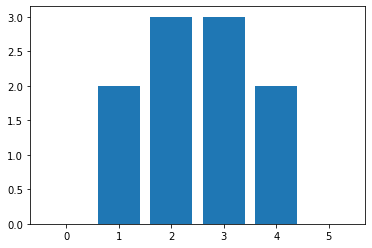

In [19]:
plt.bar(x_label,li)

In [20]:
import statistics
statistics.mean(df['score'][0:10])

2.45

###  Top 1000 Tweets

Now let us see the graph for first 1000 tweets

Text(0.5, 1.0, 'Score vs Top 1000 Trending Tweets')

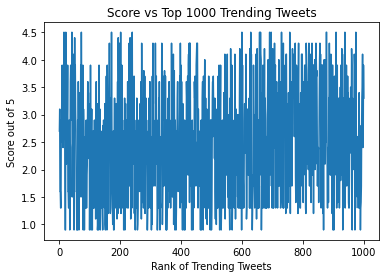

In [21]:
plt.plot(list(range(1,1001)),df['score'][0:1000])
plt.xlabel('Rank of Trending Tweets')
plt.ylabel('Score out of 5')
plt.title('Score vs Top 1000 Trending Tweets')

Now let us check bar chart for first 1000 tweets

In [22]:
x_label=(list(range(0,6)))
y_label=[round(num) for num in df['score'][0:1000]]

<BarContainer object of 6 artists>

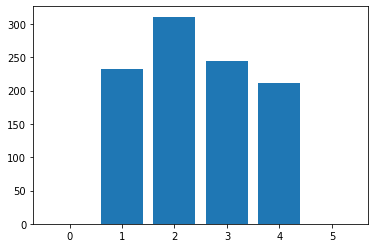

In [30]:
y_label=collections.Counter(y_label)
li = [0,0,0,0,0,0]
for i in list(y_label.keys()):
    li[i]=y_label[i]
plt.bar(x_label,li)

In [24]:
statistics.mean(df['score'][0:1000])

2.4953

Let us see the variation of scores as our value of tweets increases

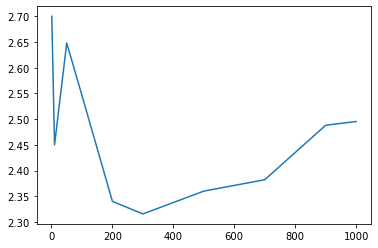

In [25]:
x=[1,10,50,100,200,300,500,700,900,1000]
y=[]
for i in x:
    y.append(statistics.mean(df['score'][0:i]))
plt.plot(x,y)

# Conclusion

In [ ]:
#conclude with your observations 